# sim_study_centred_3

## preamble

In [1]:
# importing numpy
import numpy as np
from numpy import random

In [42]:
# importing plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

In [3]:
# importing storage for results
import zarr

In [4]:
# importing pandas
import pandas as pd

## simulated data

In [5]:
# loading in functions for simulation
%run '../../function_scripts/model/UC_simulation.py'

In [60]:
# importing the csv - only the important columns
data_real = pd.read_csv("../../Antidote_household.csv", usecols=["hid","pid","date","age","sex","hiv","hivChild","cpt","result","week"])

# converting the pid to integers (and saving lists of sex and age)
pid_unique = []
no_individuals = 0
test_individuals = []
sex = []
age = []
for i in range(1659):
    pid = data_real['pid'][i]
    if pid in pid_unique:
        test_individuals.append(pid_unique.index(pid))
    else:
        pid_unique.append(pid)
        test_individuals.append(no_individuals)
        sex.append(data_real['sex'][i])
        age.append(data_real['age'][i])
        no_individuals += 1
sex = np.array(sex)
age = np.array(age)

# centring age and sex
age = age - np.mean(age)
sex = sex - np.mean(sex)

# calculating N and T
N = no_individuals
T = int(max(data_real['week']))

# making a test result matrix (for the real test results)
test_results_real = np.tile(np.nan,(T+1,N))
for i in range(1659):
    j = test_individuals[i]
    t = int(data_real['week'][i])
    test_results_real[t,j] = data_real['result'][i]

# converting the hid to integers
hid_unique = []
no_houses = 0
test_houses = []
for hid in data_real['hid'] :
    if hid in hid_unique:
        test_houses.append(hid_unique.index(hid))
    else:
        hid_unique.append(hid)
        test_houses.append(no_houses)
        no_houses += 1

# list of which house each individual is in
house_list = []
for i in range(N):
    test_no = test_individuals.index(i)
    house_list.append(test_houses[test_no])

# making a household mixing matrix
h = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if house_list[i]==house_list[j]:
            h[i,j] = 1

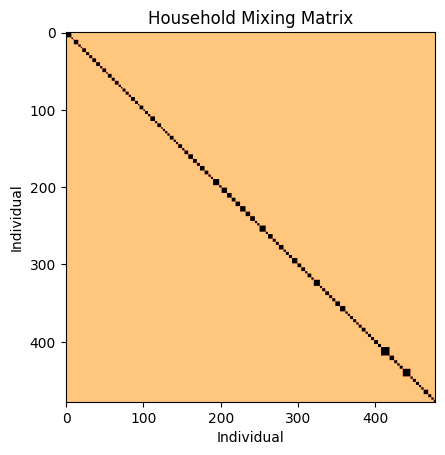

In [7]:
# plotting h
plt.imshow(h,cmap="copper_r")
plt.title("Household Mixing Matrix")
plt.ylabel("Individual")
plt.xlabel("Individual")
plt.show()

In [8]:
#proportion of sex=1
np.mean(sex)

1.8581138487450318e-17

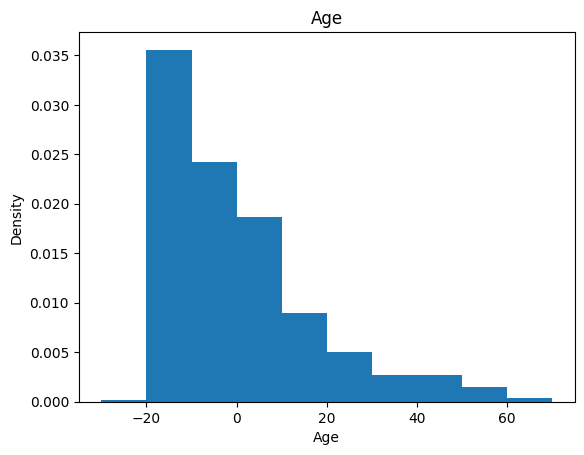

In [9]:
# plotting age
plt.hist(age,density=1,bins=[-30,-20,-10,0,10,20,30,40,50,60,70])
plt.title("Age")
plt.ylabel("Density")
plt.xlabel("Age")
plt.show()

In [10]:
# true values of the paramters
theta = np.array([0.1,1.5,0,0])

In [11]:
# true values of other inputs
prop_0 = 0.3
gamma = 0.5
test_rate = 0.3 #will be replaced with other test data, but parameter needed for simulation
sens = 0.95
spec = 0.999

In [12]:
# seasonality modifiers
seasonality_mode = 2
seasonal_period = 52
t_ast = 17

# resulting matrices
seasonal_vector = np.array([1 - np.cos(2*np.pi*(t+t_ast)/seasonal_period) for t in range(T+1)])
seasonal_matrix_G = np.tile(seasonal_vector, (N,1)).T
seasonal_matrix_H = np.tile(1, (T+1,N))

In [13]:
# simulating the data
UC_results = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

In [14]:
# creating a test result matrix
random.seed(256)
test_occurance = test_results_real*0 + 1
pos_prob = 0.9*UC_results['X'] + (1-0.99)*(1-UC_results['X'])
test_outcome = random.binomial(1,pos_prob)
test_results = test_outcome * test_occurance

/tmp/ipykernel_5686/1869204714.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_5686/1869204714.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


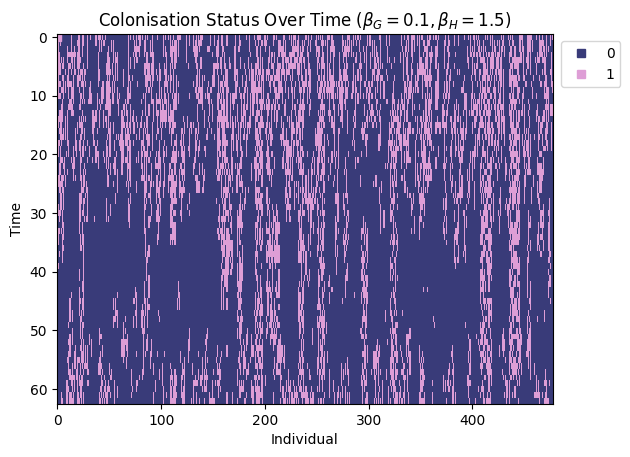

In [15]:
# plotting X
plt.imshow(UC_results['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), scatterpoints=1)
plt.title(r'Colonisation Status Over Time ($\beta_G=0.1, \beta_H=1.5$)')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

/tmp/ipykernel_5686/2148158925.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_5686/2148158925.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


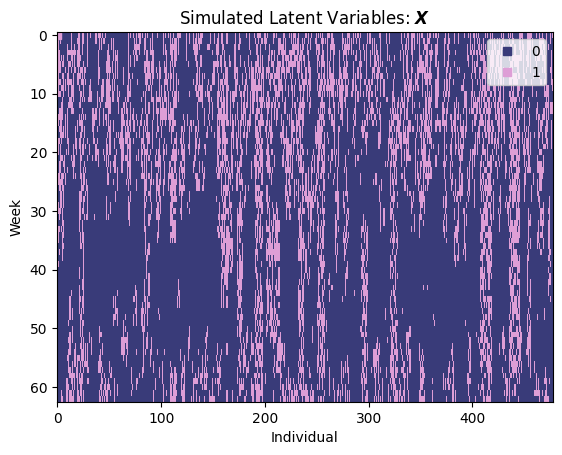

In [16]:
# plotting X
plt.imshow(UC_results['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", scatterpoints=1)
plt.title(r'Simulated Latent Variables: $\boldsymbol{X}$')
plt.ylabel("Week")
plt.xlabel("Individual")
plt.savefig("latent_variables_for_poster.pdf")
plt.show()

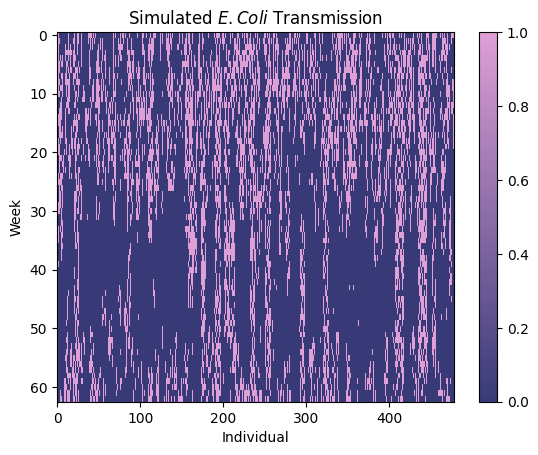

In [59]:
# plotting X
custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#383a78","#df9fd7"])
plt.imshow(UC_results['X'],cmap=custom_map,interpolation="nearest",aspect="auto")
plt.colorbar()
plt.title(r'Simulated $E. Coli$ Transmission')
plt.ylabel("Week")
plt.xlabel("Individual")
plt.savefig("latent_variables.pdf")
plt.show()

In [17]:
# simulating other datasets
UC_results2 = UC_sim(N,h,age,sex,prop_0,np.array([0.1,3,0,0]),gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)
UC_results3 = UC_sim(N,h,age,sex,prop_0,np.array([1.5,0.1,0,0]),gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)

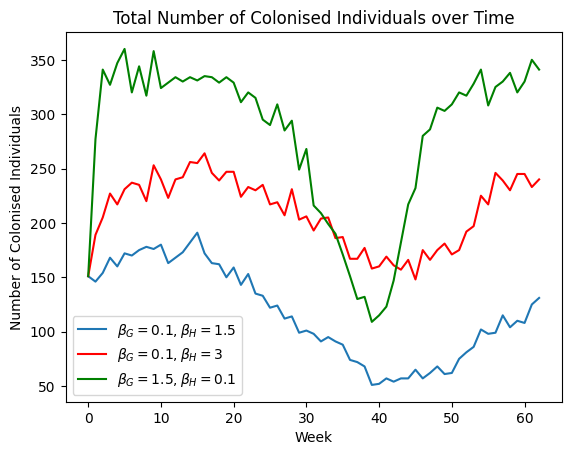

In [18]:
# plotting the number of colonised individuals over time
plt.plot(UC_results['sum_C'],label=r'$\beta_G=0.1, \beta_H=1.5$')
plt.plot(UC_results2['sum_C'],label=r'$\beta_G=0.1, \beta_H=3$',color="red")
plt.plot(UC_results3['sum_C'],label=r'$\beta_G=1.5, \beta_H=0.1$',color="green")
plt.legend()
plt.title("Total Number of Colonised Individuals over Time")
plt.ylabel("Number of Colonised Individuals")
plt.xlabel("Week")
plt.show()

/tmp/ipykernel_5686/3765168887.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
/tmp/ipykernel_5686/3765168887.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")


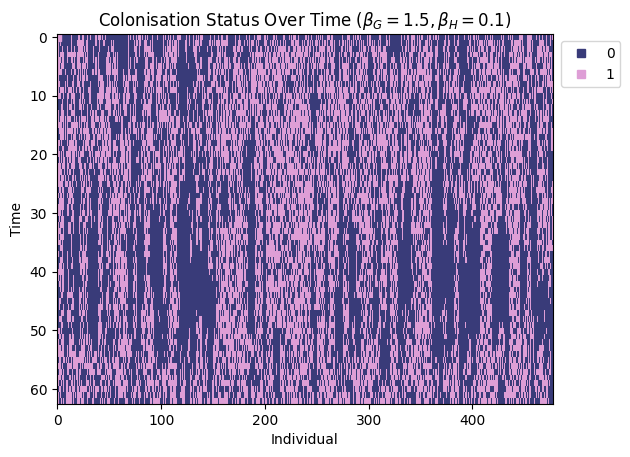

In [19]:
# plotting X
plt.imshow(UC_results2['X'],cmap="tab20b",interpolation="nearest",aspect="auto")
#plt.colorbar()
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="%d"%0, linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="%d"%1, linestyle='', marker="s")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), scatterpoints=1)
plt.title(r'Colonisation Status Over Time ($\beta_G=1.5, \beta_H=0.1$)')
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

/tmp/ipykernel_5686/895814803.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_5686/895814803.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
/tmp/ipykernel_5686/895814803.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")


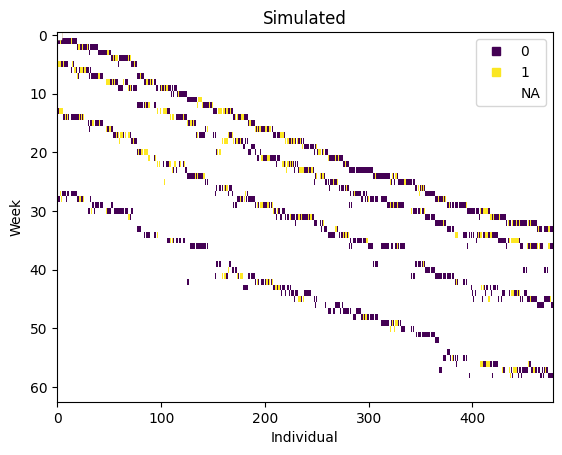

In [20]:
# looking at the test result matrix
plt.imshow(test_results,cmap="viridis",interpolation="nearest",aspect="auto")
colour0 = '#440154'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#fae622'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
colour2 = '#ffffff'
plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")
plt.legend(loc="upper right", scatterpoints=1)
plt.title(r'Simulated')
plt.ylabel("Week")
plt.xlabel("Individual")
plt.savefig("test_results_sim.pdf")
plt.show()

/tmp/ipykernel_5686/1620054812.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_5686/1620054812.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
/tmp/ipykernel_5686/1620054812.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")


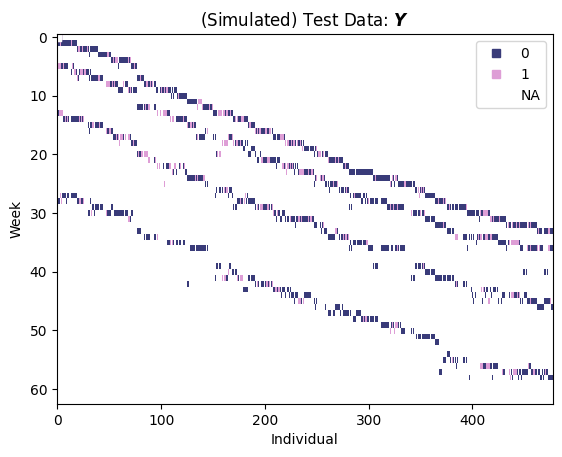

In [65]:
# looking at the test result matrix
plt.imshow(test_results,cmap="tab20b",interpolation="nearest",aspect="auto")
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
colour2 = '#ffffff'
plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")
plt.legend(loc="upper right", scatterpoints=1)
plt.title(r'(Simulated) Test Data: $\boldsymbol{Y}$')
plt.ylabel("Week")
plt.xlabel("Individual")
plt.savefig("test_results_sim_for_poster.pdf")
plt.show()

In [21]:
# function to work out the number of TP/FP/TN/FNs
def test_acc(X:np.array,test_results:np.array) :
    
    # list of inputs:
    # X - matrix of all individuals colonisation status over time
    # test_results - matrix of all individuals colonisation status over time

    # creating a matrix comparing the results with the current latent variable values (0 for TPs or TNs, 1 for FPs, -1 for FNs, and nan for no tests)
    test_diff_matrix = test_results - X

    # calculating the number of TP/FP/TN/FNs from this matrix
    TP = np.sum((test_diff_matrix==0)*X)
    FN = np.sum(test_diff_matrix==-1)
    FP = np.sum(test_diff_matrix==1)
    TN = np.sum((test_diff_matrix==0)*(1-X))

    # returning outputs
    output = {'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN}
    return output

In [22]:
# the number of TP/FP/TN/FNs
test_acc(UC_results['X'],test_results)

{'TP': 363, 'FN': 38, 'FP': 16, 'TN': 1156}

## inference information

In [23]:
# hyperparameters of priors
mu = np.array([0.001,0.001,0.001,0.001])
prior_X_0 = 0.3

In [24]:
# starting values
theta_start = np.array([0.5,0.5,0,0])
X_start = UC_sim(N,h,age,sex,prop_0,theta,gamma,test_rate,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)['X']
covariance_start = 0.8*0.000001*np.identity(4)
scaling = 0.8

In [25]:
# MCMC iterations
K = 100000
K_latent = 400

## acceptance rates

In [31]:
# importing the saved acceptance rates
MCMC_noncentred_acc = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/acc.zarr', mode='r')

# printing the acceptance rates
print("acc_theta:", MCMC_noncentred_acc[0])
print("acc_initial:", MCMC_noncentred_acc[1])
print("acc_latent:", MCMC_noncentred_acc[2])

# removing the acceptance rates from memory
del(MCMC_noncentred_acc)

acc_theta: 0.31286
acc_initial: 0.30274
acc_latent: 0.539870475


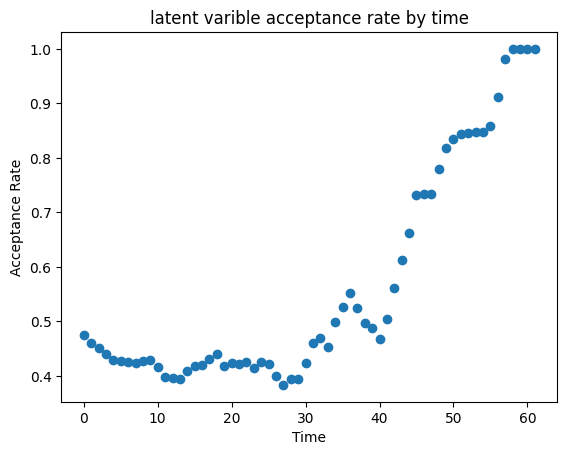

In [53]:
# importing the saved acceptance rates
MCMC_noncentred_acc_latent_times = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/acc_latent_times.zarr', mode='r')

# plotting the acceptance rate at each point in time
plt.scatter(range(T),MCMC_noncentred_acc_latent_times[:])
lobf = np.polyfit(range(T),MCMC_noncentred_acc_latent_times[:],1)
plt.title("latent varible acceptance rate by time")
plt.xlabel("Time")
plt.ylabel("Acceptance Rate")
plt.show()

# removing the acceptance rates from memory
del(MCMC_noncentred_acc_latent_times)

## parameters

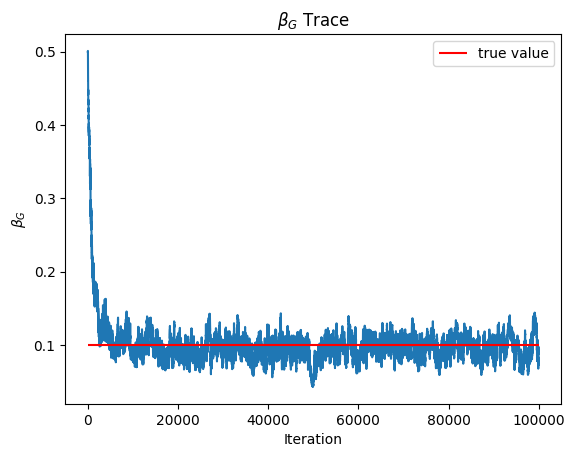

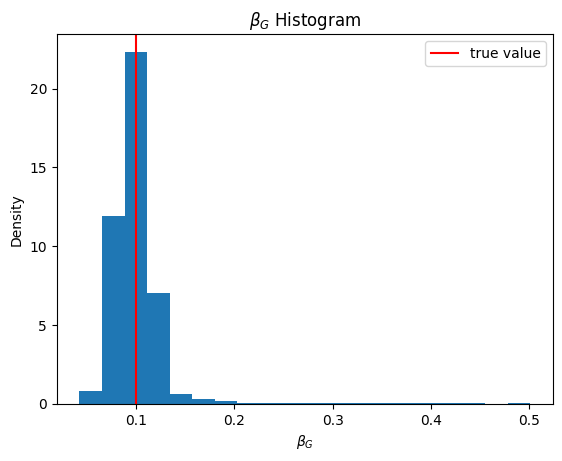

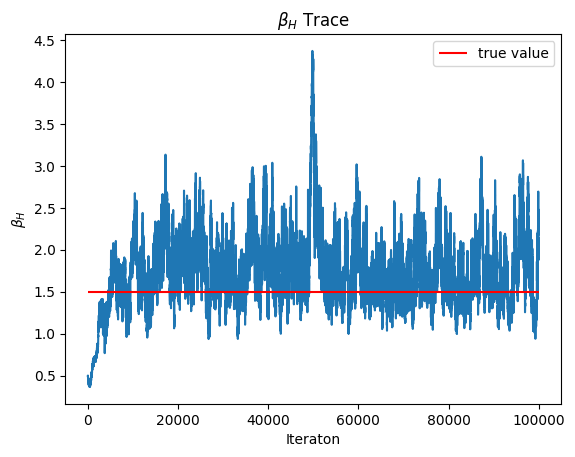

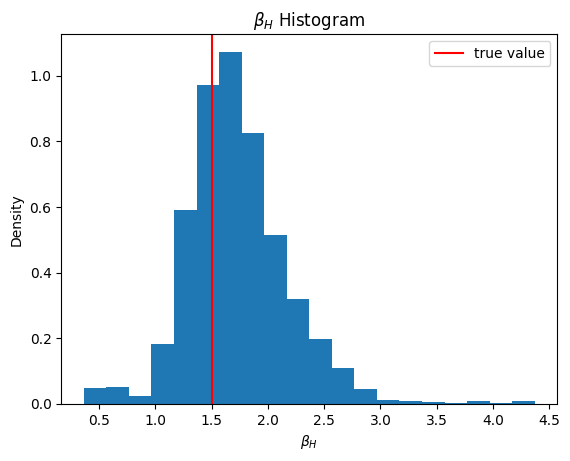

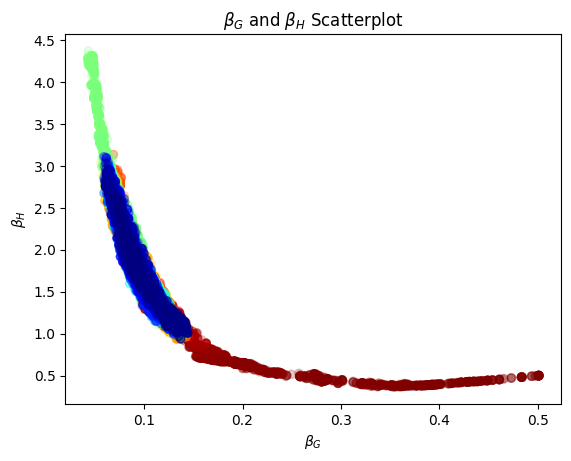

In [54]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# trace plot and histogram of beta_G
plt.plot(MCMC_noncentred_theta[:K,0])
plt.hlines(np.array(theta[0]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_G$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\beta_G$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,0],density=1,bins=20)
plt.axvline(theta[0],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_G$ Histogram')
plt.xlabel(r'$\beta_G$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of beta_H
plt.plot(MCMC_noncentred_theta[:K,1])
plt.hlines(np.array(theta[1]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_{H}$ Trace')
plt.xlabel("Iteraton")
plt.ylabel(r'$\beta_{H}$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,1],density=1,bins=20)
plt.axvline(theta[1],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_{H}$ Histogram')
plt.xlabel(r'$\beta_{H}$')
plt.ylabel("Density")
plt.show()

# correlation plot of beta_G vs beta_H
plt.scatter(MCMC_noncentred_theta[:K,0],MCMC_noncentred_theta[:K,1],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \beta_{H}$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\beta_{H}$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

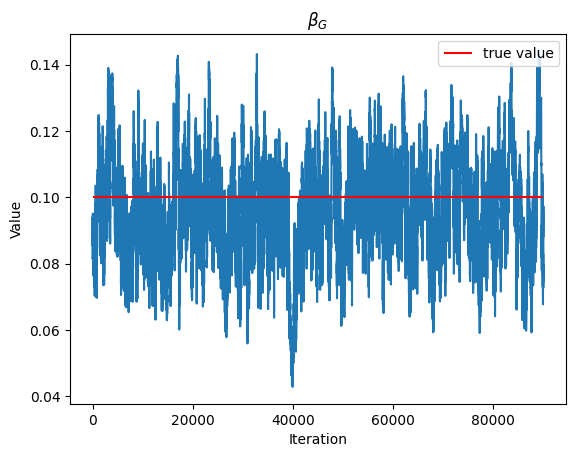

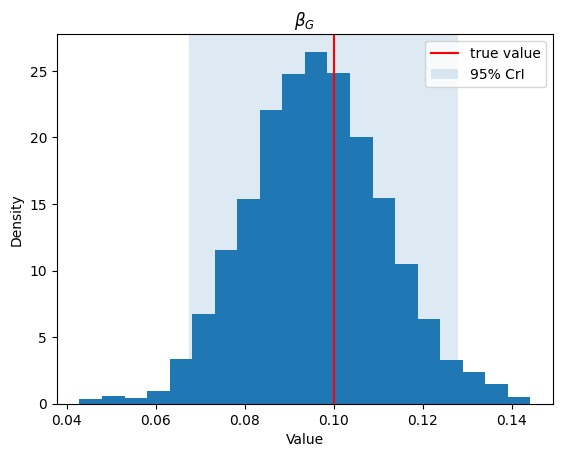

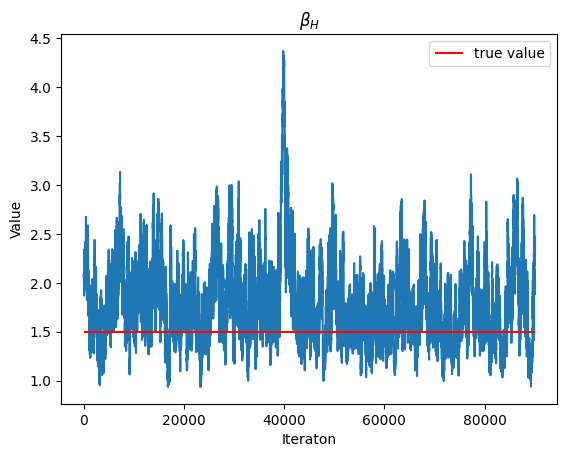

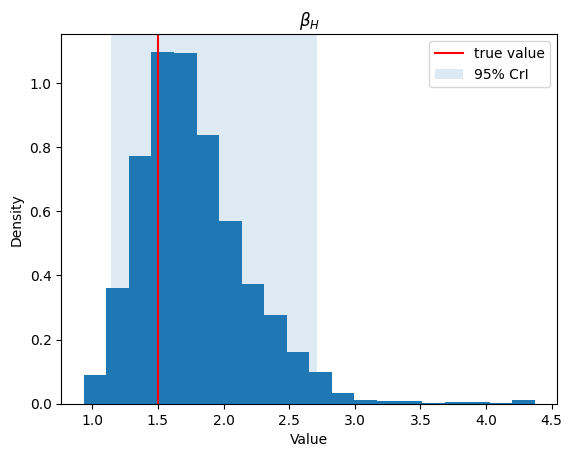

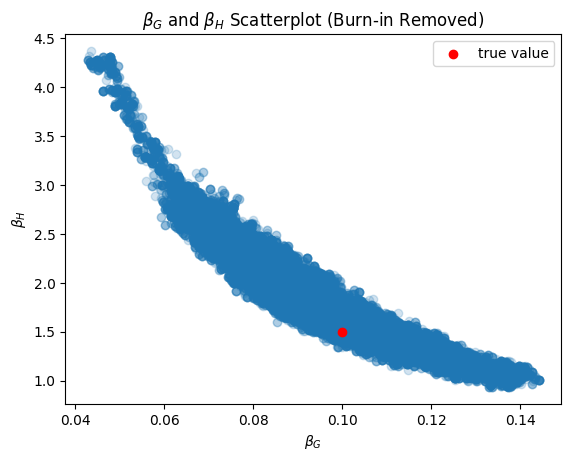

beta_G: [0.0673385  0.09581827 0.12798773]
beta_H: [1.14547995 1.71040842 2.71097172]


In [35]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# trace plot and histogram of beta_G
plt.plot(MCMC_noncentred_theta[10000:,0])
plt.hlines(np.array(theta[0]),0,K-10000,colors="red",label="true value")
plt.legend(loc = "upper right")
plt.title(r'$\beta_G$')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.savefig("beta_G_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[10000:,0],density=1,bins=20)
plt.axvline(theta[0],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[10000:,0],0.025),np.quantile(MCMC_noncentred_theta[10000:,0],0.975),alpha=0.15,label="95% CrI")
plt.legend(loc = "upper right")
plt.title(r'$\beta_G$')
plt.xlabel("Value")
plt.ylabel("Density")
plt.savefig("beta_G_hist.pdf")
plt.show()

# trace plot and histogram of beta_H
plt.plot(MCMC_noncentred_theta[10000:,1])
plt.hlines(np.array(theta[1]),0,K-10000,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_{H}$')
plt.xlabel("Iteraton")
plt.ylabel("Value")
#plt.savefig("beta_H_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[10000:,1],density=1,bins=20)
plt.axvline(theta[1],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[10000:,1],0.025),np.quantile(MCMC_noncentred_theta[10000:,1],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\beta_{H}$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("beta_H_hist.pdf")
plt.show()

# correlation plot of beta_G vs beta_H
plt.scatter(MCMC_noncentred_theta[10000:,0],MCMC_noncentred_theta[10000:,1],alpha=0.2)
plt.scatter(theta[0],theta[1],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_G \text{ and } \beta_{H}$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\beta_{H}$')
plt.show()

# median and 95% credible intervals
print("beta_G:", np.quantile(MCMC_noncentred_theta[10000:,0],[0.025,0.5,0.975]))
print("beta_H:", np.quantile(MCMC_noncentred_theta[10000:,1],[0.025,0.5,0.975]))

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

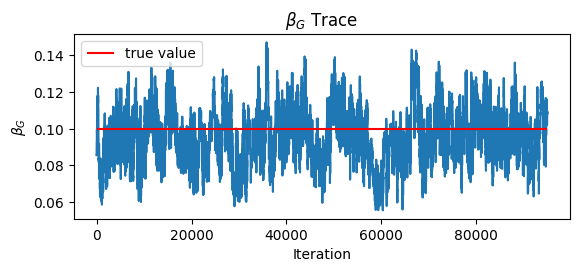

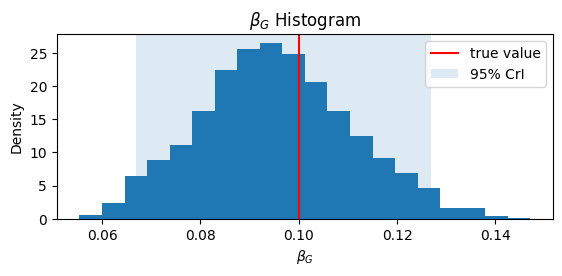

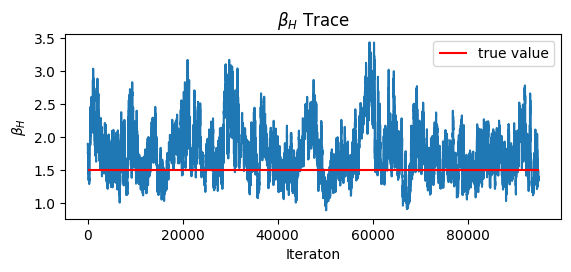

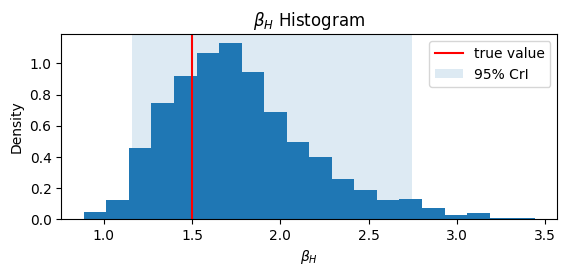

In [44]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# trace plot and histogram of beta_G
plt.figure(figsize=(6.4,2.4))
plt.plot(MCMC_noncentred_theta[5000:,0])
plt.hlines(np.array(theta[0]),0,K-5000,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_G$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\beta_G$')
plt.show()
plt.figure(figsize=(6.4,2.4))
plt.hist(MCMC_noncentred_theta[5000:,0],density=1,bins=20)
plt.axvline(theta[0],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[5000:,0],0.025),np.quantile(MCMC_noncentred_theta[5000:,0],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\beta_G$ Histogram')
plt.xlabel(r'$\beta_G$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of beta_H
plt.figure(figsize=(6.4,2.4))
plt.plot(MCMC_noncentred_theta[5000:,1])
plt.hlines(np.array(theta[1]),0,K-5000,colors="red",label="true value")
plt.legend()
plt.title(r'$\beta_{H}$ Trace')
plt.xlabel("Iteraton")
plt.ylabel(r'$\beta_{H}$')
plt.show()
plt.figure(figsize=(6.4,2.4))
plt.hist(MCMC_noncentred_theta[5000:,1],density=1,bins=20)
plt.axvline(theta[1],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[5000:,1],0.025),np.quantile(MCMC_noncentred_theta[5000:,1],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\beta_{H}$ Histogram')
plt.xlabel(r'$\beta_{H}$')
plt.ylabel("Density")
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

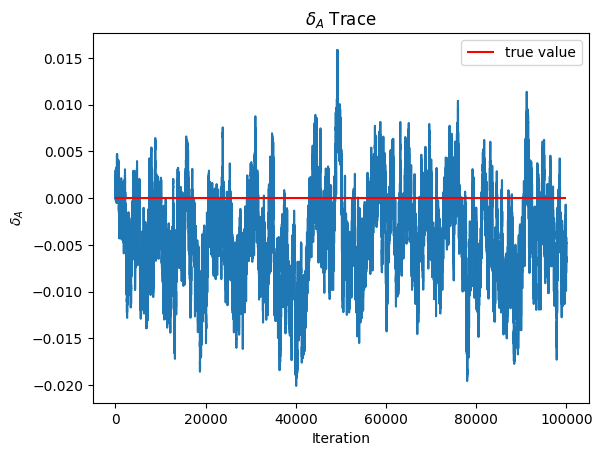

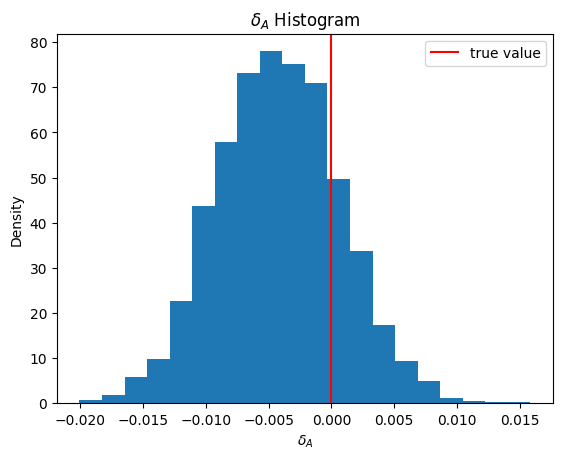

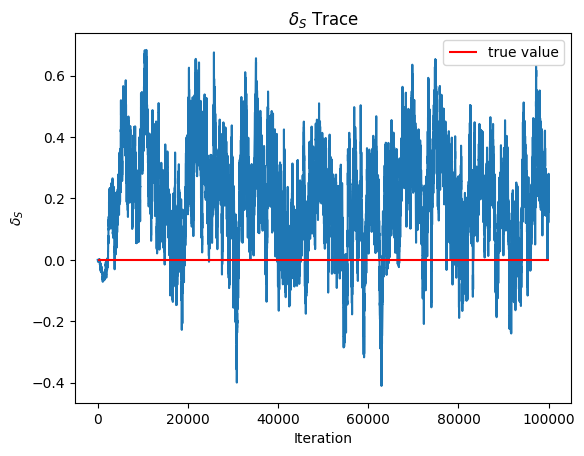

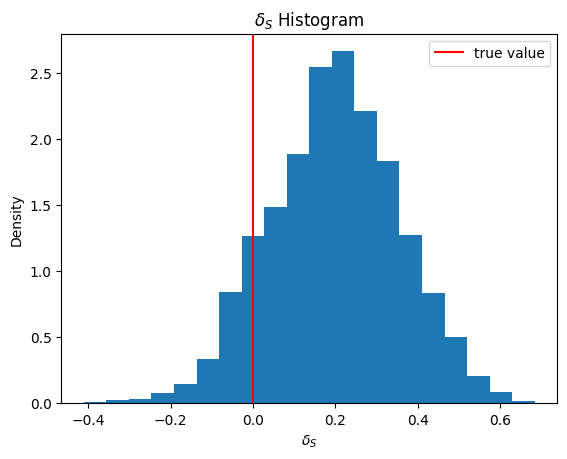

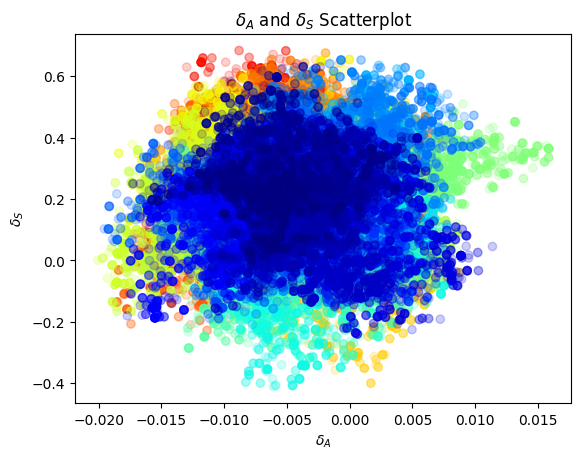

In [56]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# trace plot and histogram of delta_A
plt.plot(MCMC_noncentred_theta[:K,2])
plt.hlines(np.array(theta[2]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_A$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_A$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,2],density=1,bins=20)
plt.axvline(theta[2],color="red",label="true value")
plt.legend()
plt.title(r'$\delta_A$ Histogram')
plt.xlabel(r'$\delta_A$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of delta_S
plt.plot(MCMC_noncentred_theta[:K,3])
plt.hlines(np.array(theta[3]),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_S$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_S$')
plt.show()
plt.hist(MCMC_noncentred_theta[:K,3],density=1,bins=20)
plt.axvline(theta[3],color="red",label="true value")
plt.legend()
plt.title(r'$\delta_S$ Histogram')
plt.xlabel(r'$\delta_S$')
plt.ylabel("Density")
plt.show()

# correlation plot of deltas
plt.scatter(MCMC_noncentred_theta[:K,2],MCMC_noncentred_theta[:K,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\delta_A \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\delta_A$')
plt.ylabel(r'$\delta_S$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

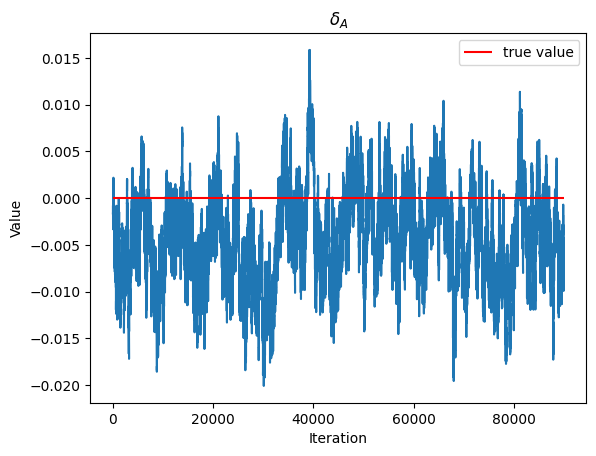

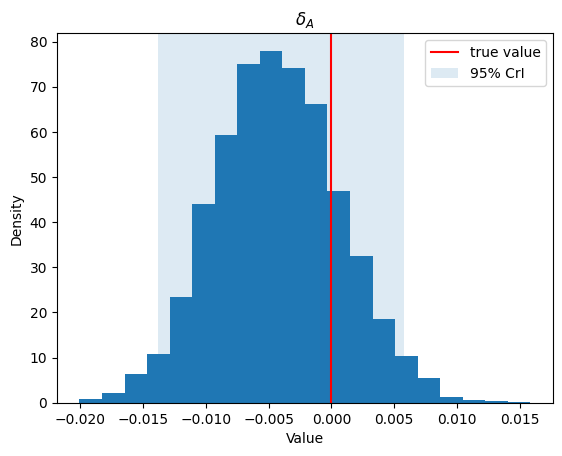

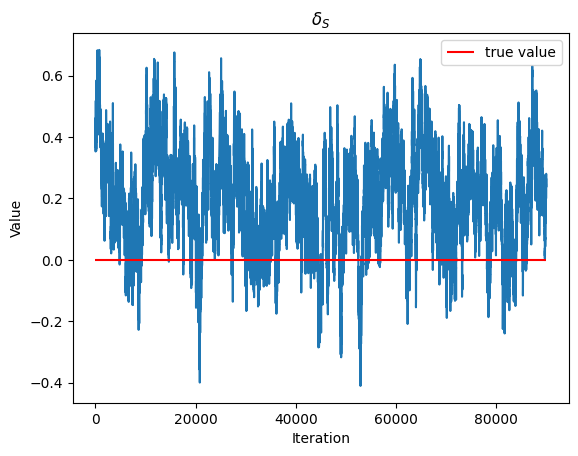

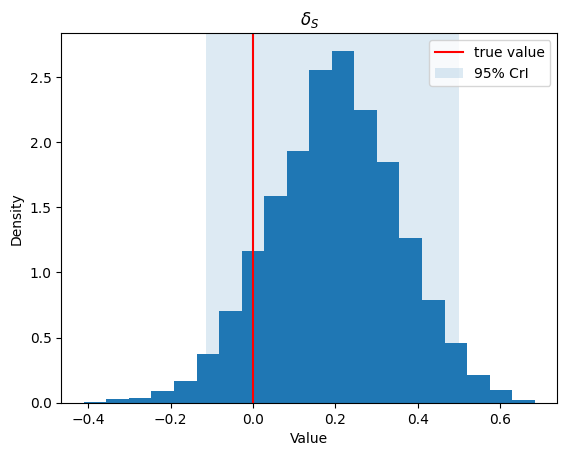

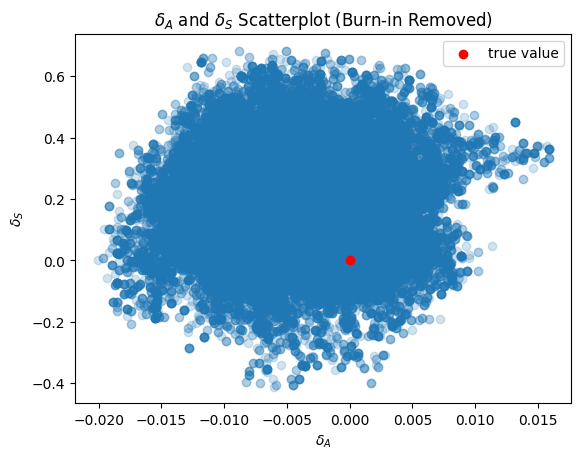

delta_A: [-0.01378856 -0.00442399  0.00574883]
delta_S: [-0.11407872  0.20161082  0.50028999]


In [41]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# trace plot and histogram of delta_A
plt.plot(MCMC_noncentred_theta[10000:,2])
plt.hlines(np.array(theta[2]),0,K-10000,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_A$')
plt.xlabel("Iteration")
plt.ylabel("Value")
#plt.savefig("delta_A_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[10000:,2],density=1,bins=20)
plt.axvline(theta[2],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[10000:,2],0.025),np.quantile(MCMC_noncentred_theta[10000:,2],0.975),alpha=0.15,label="95% CrI")
plt.legend(loc='upper right')
plt.title(r'$\delta_A$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("delta_A_hist.pdf")
plt.show()

# trace plot and histogram of delta_S
plt.plot(MCMC_noncentred_theta[10000:,3])
plt.hlines(np.array(theta[3]),0,K-10000,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_S$')
plt.xlabel("Iteration")
plt.ylabel("Value")
#plt.savefig("delta_S_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[10000:,3],density=1,bins=20)
plt.axvline(theta[3],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[10000:,3],0.025),np.quantile(MCMC_noncentred_theta[10000:,3],0.975),alpha=0.15,label="95% CrI")
plt.legend(loc='upper right')
plt.title(r'$\delta_S$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("delta_S_hist.pdf")
plt.show()

# correlation plot of deltas
plt.scatter(MCMC_noncentred_theta[10000:,2],MCMC_noncentred_theta[10000:,3],alpha=0.2)
plt.scatter(theta[2],theta[3],color="red",label="true value")
plt.legend()
plt.title(r'$\delta_A \text{ and } \delta_S$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\delta_A$')
plt.ylabel(r'$\delta_S$')
plt.show()

# median and 95% credible intervals
print("delta_A:", np.quantile(MCMC_noncentred_theta[10000:,2],[0.025,0.5,0.975]))
print("delta_S:", np.quantile(MCMC_noncentred_theta[10000:,3],[0.025,0.5,0.975]))

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

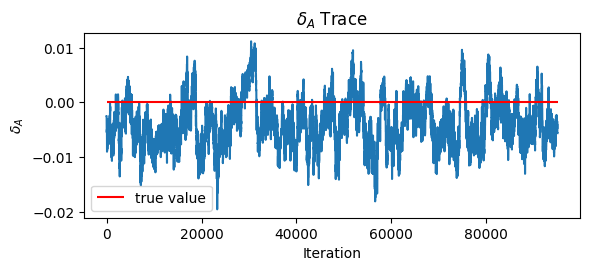

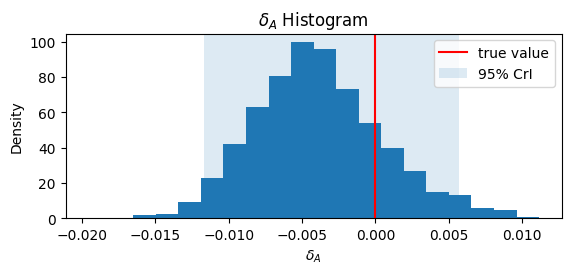

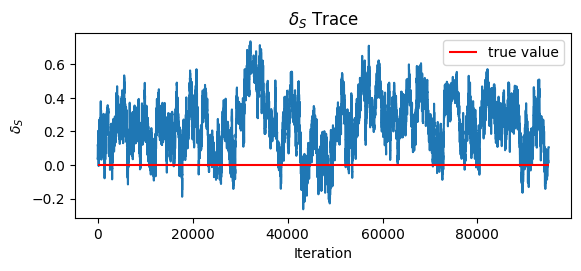

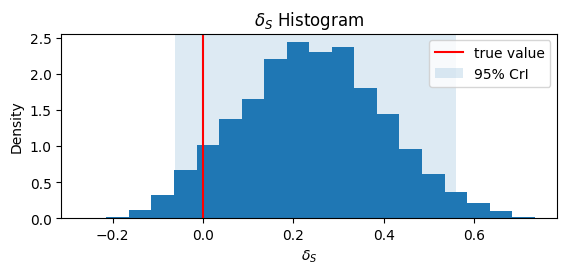

In [45]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# trace plot and histogram of delta_A
plt.figure(figsize=(6.4,2.4))
plt.plot(MCMC_noncentred_theta[5000:,2])
plt.hlines(np.array(theta[2]),0,K-5000,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_A$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_A$')
plt.show()
plt.figure(figsize=(6.4,2.4))
plt.hist(MCMC_noncentred_theta[5000:,2],density=1,bins=20)
plt.axvline(theta[2],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[5000:,2],0.025),np.quantile(MCMC_noncentred_theta[5000:,2],0.975),alpha=0.15,label="95% CrI")
plt.legend(loc='upper right')
plt.title(r'$\delta_A$ Histogram')
plt.xlabel(r'$\delta_A$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of delta_S
plt.figure(figsize=(6.4,2.4))
plt.plot(MCMC_noncentred_theta[5000:,3])
plt.hlines(np.array(theta[3]),0,K-5000,colors="red",label="true value")
plt.legend()
plt.title(r'$\delta_S$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_S$')
plt.show()
plt.figure(figsize=(6.4,2.4))
plt.hist(MCMC_noncentred_theta[5000:,3],density=1,bins=20)
plt.axvline(theta[3],color="red",label="true value")
plt.axvspan(np.quantile(MCMC_noncentred_theta[5000:,3],0.025),np.quantile(MCMC_noncentred_theta[5000:,3],0.975),alpha=0.15,label="95% CrI")
plt.legend(loc='upper right')
plt.title(r'$\delta_S$ Histogram')
plt.xlabel(r'$\delta_S$')
plt.ylabel("Density")
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

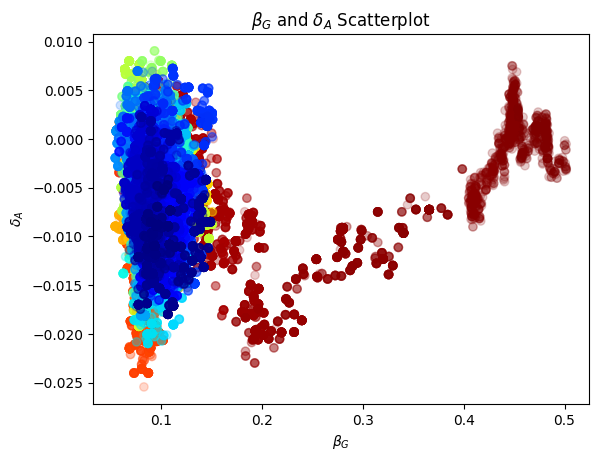

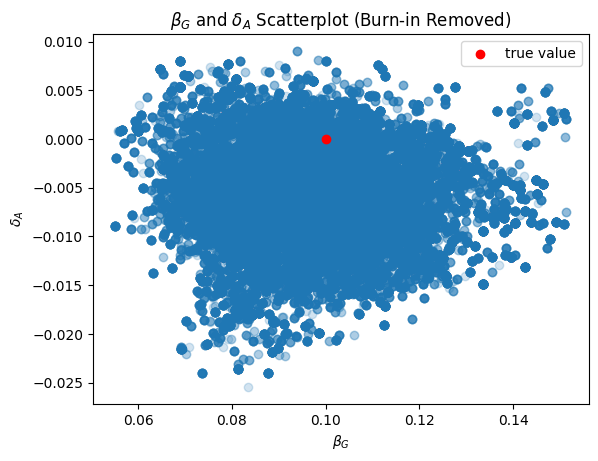

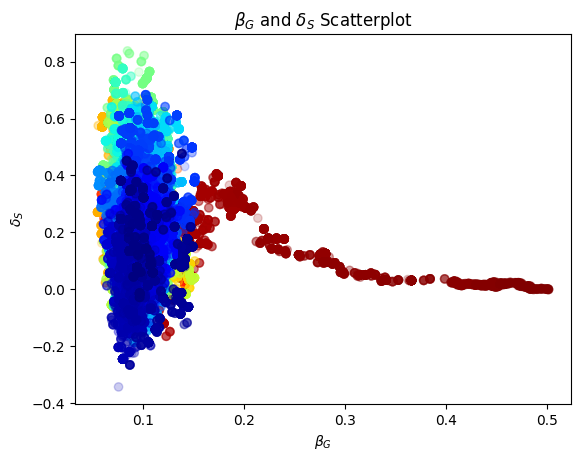

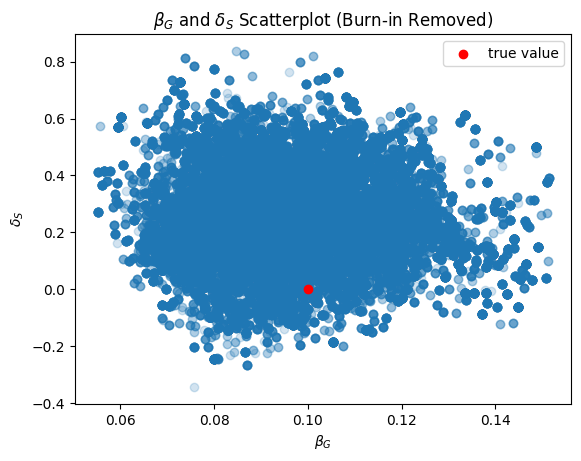

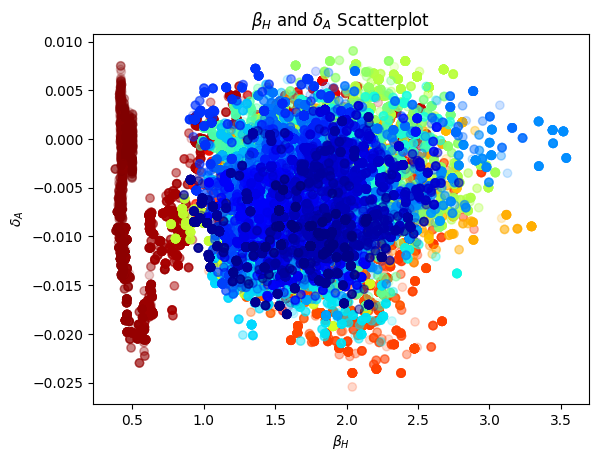

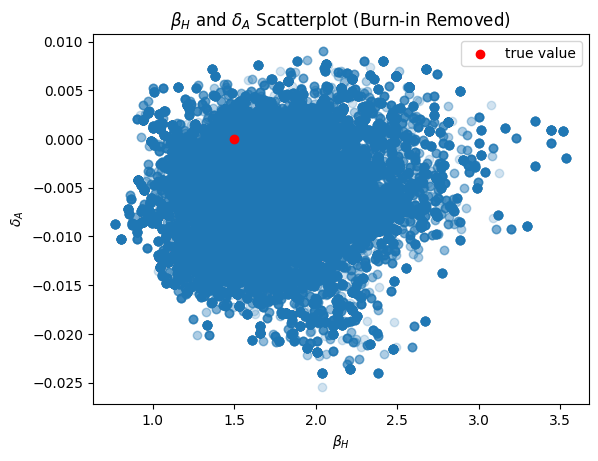

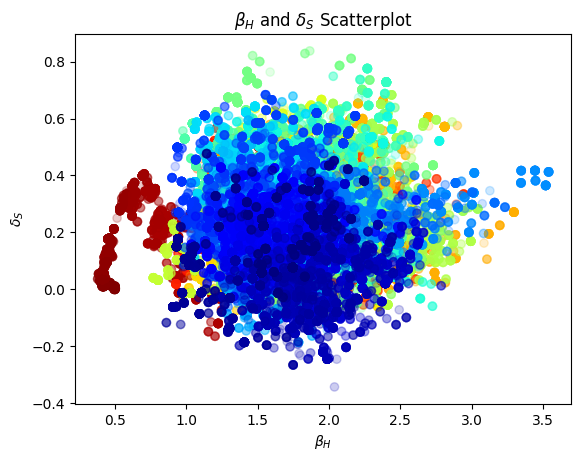

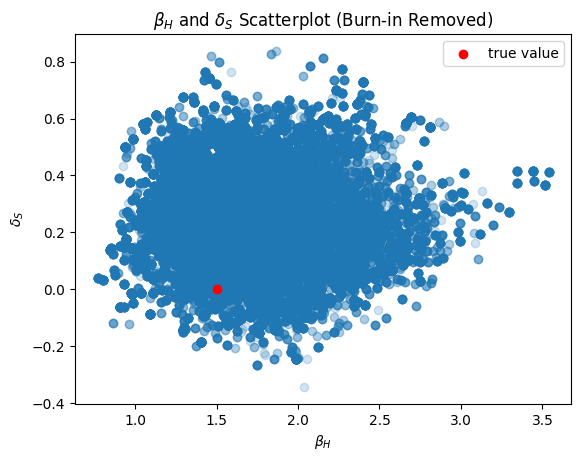

In [31]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# correlation plot of beta_G vs delta_A
plt.scatter(MCMC_noncentred_theta[:,0],MCMC_noncentred_theta[:,2],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \delta_A$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_A$')
plt.show()
plt.scatter(MCMC_noncentred_theta[5000:,0],MCMC_noncentred_theta[5000:,2],alpha=0.2)
plt.scatter(theta[0],theta[2],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_G \text{ and } \delta_A$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_A$')
plt.show()

# correlation plot of beta_G vs delta_S
plt.scatter(MCMC_noncentred_theta[:,0],MCMC_noncentred_theta[:,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_S$')
plt.show()
plt.scatter(MCMC_noncentred_theta[5000:,0],MCMC_noncentred_theta[5000:,3],alpha=0.2)
plt.scatter(theta[0],theta[3],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_G \text{ and } \delta_S$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_S$')
plt.show()

# correlation plot of beta_H vs delta_A
plt.scatter(MCMC_noncentred_theta[:,1],MCMC_noncentred_theta[:,2],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_H \text{ and } \delta_A$ Scatterplot')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_A$')
plt.show()
plt.scatter(MCMC_noncentred_theta[5000:,1],MCMC_noncentred_theta[5000:,2],alpha=0.2)
plt.scatter(theta[1],theta[2],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_H \text{ and } \delta_A$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_A$')
plt.show()

# correlation plot of beta_H vs delta_S
plt.scatter(MCMC_noncentred_theta[:,1],MCMC_noncentred_theta[:,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_H \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_S$')
plt.show()
plt.scatter(MCMC_noncentred_theta[5000:,1],MCMC_noncentred_theta[5000:,3],alpha=0.2)
plt.scatter(theta[1],theta[3],color="red",label="true value")
plt.legend()
plt.title(r'$\beta_H \text{ and } \delta_S$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_S$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

In [58]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/theta.zarr', mode='r')

# calculating MSJD
MSJD_beta_G = (np.sum((MCMC_noncentred_theta[1:,0] - MCMC_noncentred_theta[:-1,0])**2) + (theta_start[0]-MCMC_noncentred_theta[0,0])**2)/K
MSJD_beta_H = (np.sum((MCMC_noncentred_theta[1:,1] - MCMC_noncentred_theta[:-1,1])**2) + (theta_start[1]-MCMC_noncentred_theta[0,1])**2)/K
MSJD_delta_A = (np.sum((MCMC_noncentred_theta[1:,2] - MCMC_noncentred_theta[:-1,2])**2) + (theta_start[2]-MCMC_noncentred_theta[0,2])**2)/K
MSJD_delta_S = (np.sum((MCMC_noncentred_theta[1:,3] - MCMC_noncentred_theta[:-1,3])**2) + (theta_start[3]-MCMC_noncentred_theta[0,3])**2)/K

# printing MSJD
print("MSJDs")
print("beta_G:", MSJD_beta_G)
print("beta_H:", MSJD_beta_H)
print("delta_A:", MSJD_delta_A)
print("delta_S:", MSJD_delta_S)

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

MSJDs
beta_G: 4.2012288081030085e-06
beta_H: 0.002236549418400451
delta_A: 3.4651709545602825e-07
delta_S: 0.0003487368551491085


## latent variables

In [26]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# finding the quantiles
quantile_array = np.zeros((T+1,3))
for t in range(T+1):
    #print(t)
    quantile_array[t] = np.quantile(np.sum(MCMC_noncentred_X[10000:,t,:],axis=-1),[0.025,0.5,0.975])

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

In [38]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# picking a random MCMC iteration
random.seed(123)
iterations = random.randint(10000,100000,5)
print(iterations)
random_path_0 = np.sum(MCMC_noncentred_X[iterations[0],:,:],axis=-1)
random_path_1 = np.sum(MCMC_noncentred_X[iterations[1],:,:],axis=-1)
random_path_2 = np.sum(MCMC_noncentred_X[iterations[2],:,:],axis=-1)
random_path_3 = np.sum(MCMC_noncentred_X[iterations[3],:,:],axis=-1)
random_path_4 = np.sum(MCMC_noncentred_X[iterations[4],:,:],axis=-1)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

[25725 38030 27730 71404 73206]


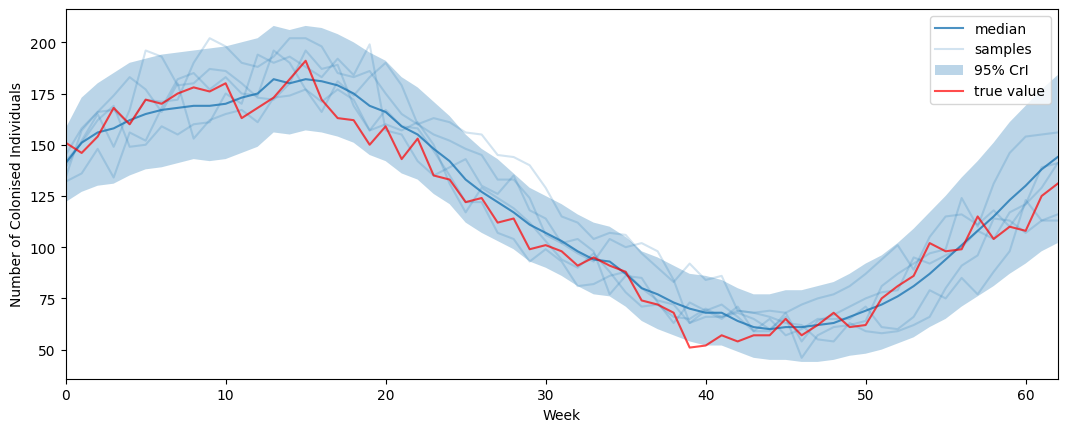

In [39]:
# 95% credible interval and median vs true (burn-in removed)
plt.figure(figsize=(12.8,4.8))
plt.plot(quantile_array[:,1], alpha=0.8, label="median")
plt.plot(random_path_0, alpha=0.2, color="tab:blue", label="samples")
plt.plot(random_path_1, alpha=0.2, color="tab:blue")
plt.plot(random_path_2, alpha=0.2, color="tab:blue")
plt.plot(random_path_3, alpha=0.2, color="tab:blue")
plt.plot(random_path_4, alpha=0.2, color="tab:blue")
plt.fill_between(range(T+1), quantile_array[:,0], quantile_array[:,2], alpha=0.3, label="95% CrI")
plt.plot(np.sum(UC_results['X'],axis=1), color="red", alpha=0.7, label="true value")
plt.legend(loc="upper right")
#plt.title("Number of Colonised Individuals")
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
plt.xlim(0,62)
#plt.savefig("colonised.pdf")
plt.show()

In [36]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# finding the mean
X_mean = np.zeros((T+1,N))
X_sd = np.zeros((T+1,N))
for t in range(T+1):
    X_mean[t] = np.mean(MCMC_noncentred_X[10000:,t],axis=0)
    X_sd[t] = np.std(MCMC_noncentred_X[10000:,t],axis=0)
    print(t)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


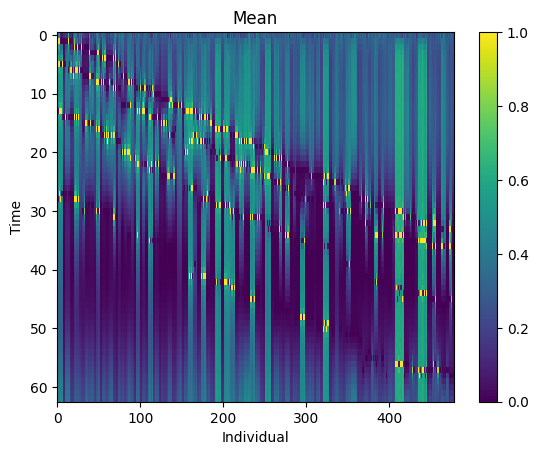

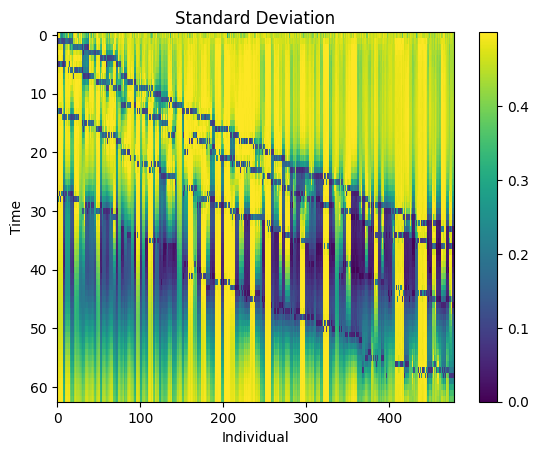

In [39]:
# plotting the mean and std
plt.imshow(X_mean,interpolation="nearest",aspect="auto",vmin=0,vmax=1)
plt.title(r'Mean')
plt.colorbar()
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()
plt.imshow(X_sd,interpolation="nearest",aspect="auto",vmin=0)
plt.title(r'Standard Deviation')
plt.colorbar()
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

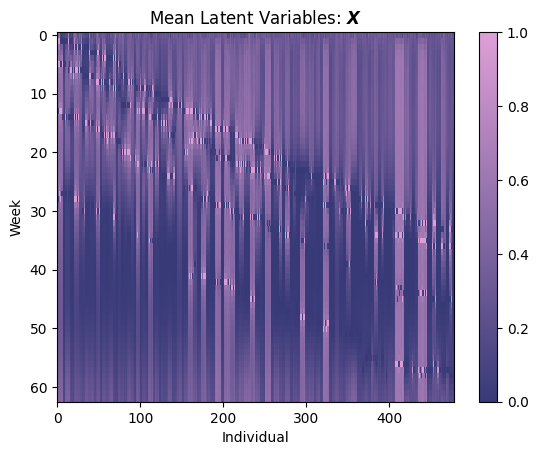

In [68]:
# plotting the mean and std
custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#383a78","#df9fd7"])
plt.imshow(X_mean,interpolation="nearest",cmap=custom_map,aspect="auto",vmin=0,vmax=1)
plt.title(r'Mean Latent Variables: $\boldsymbol{X}$')
plt.colorbar()
plt.ylabel("Week")
plt.xlabel("Individual")
plt.savefig("mean_latent_for_poster.pdf")
plt.show()

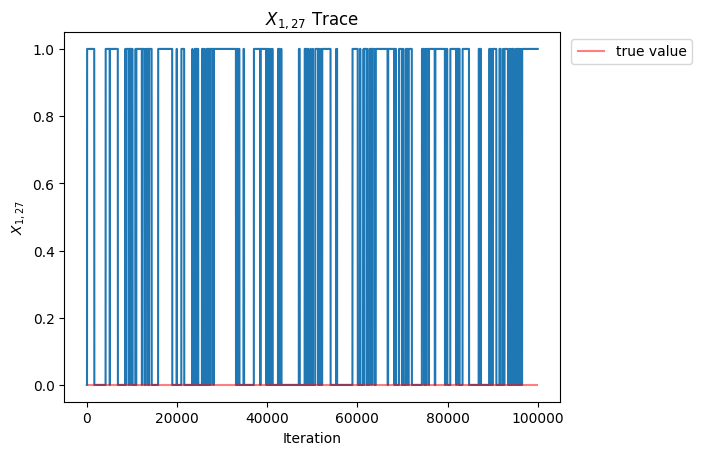

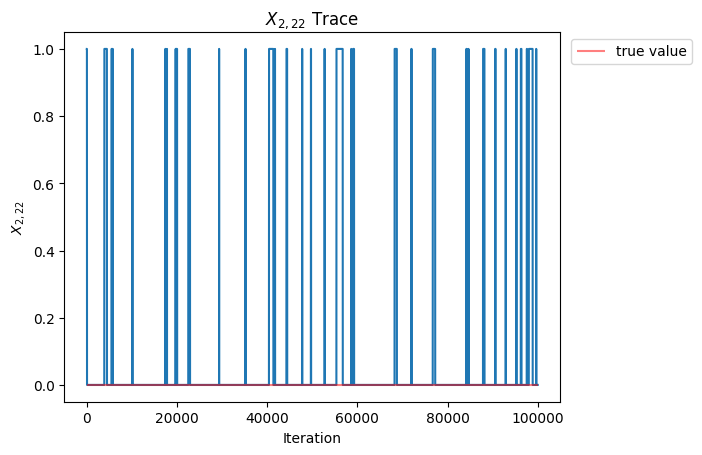

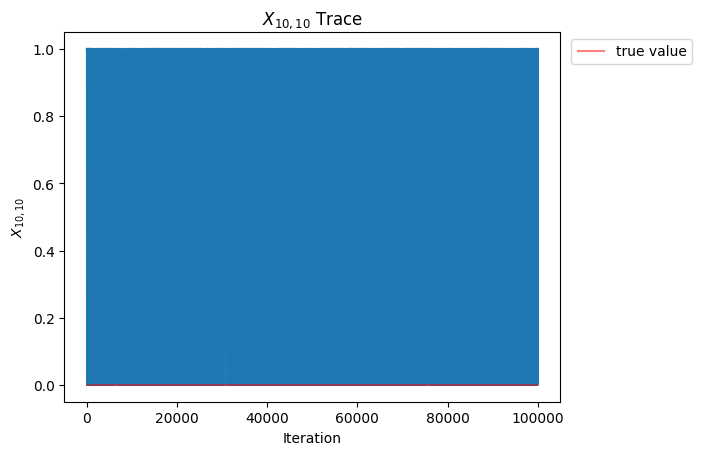

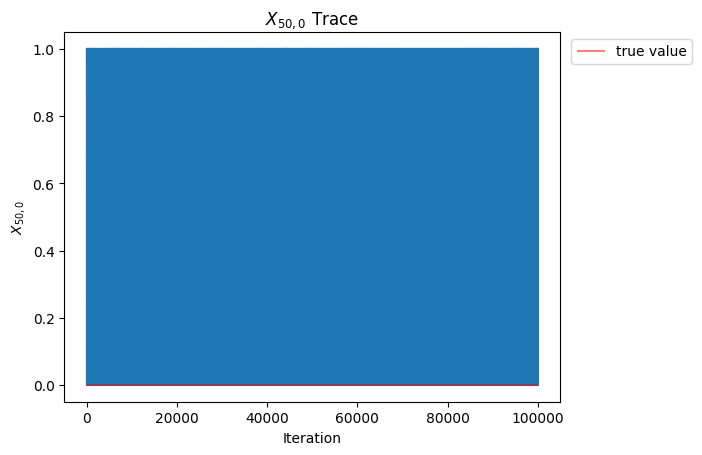

In [35]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# Trace plots of elements of X
plt.plot(MCMC_noncentred_X[:,1,27])
plt.hlines(UC_results['X'][1,27],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{1,27}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{1,27}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,2,22])
plt.hlines(UC_results['X'][2,22],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{2,22}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{2,22}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,10,10])
plt.hlines(UC_results['X'][10,10],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{10,10}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{10,10}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,50,0])
plt.hlines(UC_results['X'][50,0],0,K,colors="red",alpha=0.5,label="true value")
plt.legend(loc="upper right", bbox_to_anchor=(1.28, 1.0))
plt.title(r'$X_{50,0}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{50,0}$')
plt.show()

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

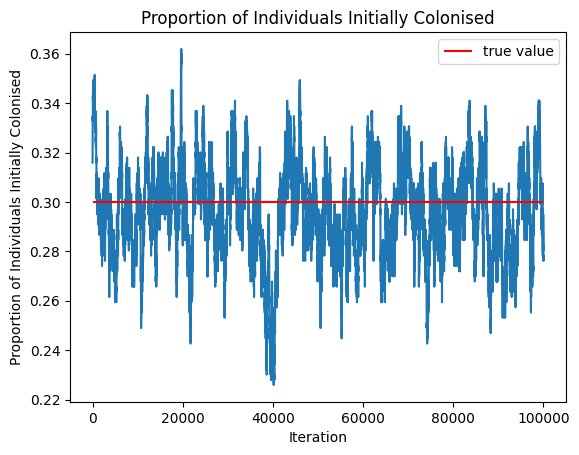

In [26]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# proportion of individuals colonised at time 0
plt.plot(np.average(MCMC_noncentred_X[:,0,:],axis=1))
#plt.hlines(np.average(UC_results['X'][0]),0,K,colors="red",label="true value")
plt.hlines(prior_X_0,0,K,colors="red",label="true value")
plt.legend()
plt.title("Proportion of Individuals Initially Colonised")
plt.xlabel("Iteration")
plt.ylabel("Proportion of Individuals Initially Colonised")
plt.show()

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

In [35]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# calculating the MSJD for the final 1000 iterations
MSJD = 0
#MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1-1000,K-1):
    print(i, end='\r')
    MSJD += np.sum(np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1]))
#MSJD = MSJD/K
MSJD = MSJD/1000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

1704.928


In [37]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/X.zarr', mode='r')

# calculating the MSJD *for the final 10000 iterations*
MSJD = np.zeros((T+1,N))
#MSJD += np.sum(np.absolute(X_start-MCMC_noncentred_X[0]))
for i in range(K-1-90000,K-1):
    MSJD += np.absolute(MCMC_noncentred_X[i]-MCMC_noncentred_X[i+1])
#MSJD = MSJD/K
MSJD = MSJD/90000
print(MSJD)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

[[1.66666667e-04 1.11111111e-05 2.22222222e-04 ... 9.11111111e-04
  9.77777778e-04 1.02222222e-03]
 [5.11111111e-04 1.55555556e-04 6.44444444e-04 ... 1.22222222e-02
  1.25777778e-02 1.16666667e-02]
 [5.16666667e-03 3.94444444e-03 4.86666667e-03 ... 2.10888889e-02
  2.27555556e-02 2.26888889e-02]
 ...
 [3.95655556e-01 3.92666667e-01 3.93344444e-01 ... 5.08222222e-02
  7.03111111e-02 6.85777778e-02]
 [4.04744444e-01 4.01866667e-01 4.02166667e-01 ... 7.66888889e-02
  9.91777778e-02 9.65111111e-02]
 [4.17944444e-01 4.12955556e-01 4.11188889e-01 ... 9.72666667e-02
  1.24511111e-01 1.21988889e-01]]


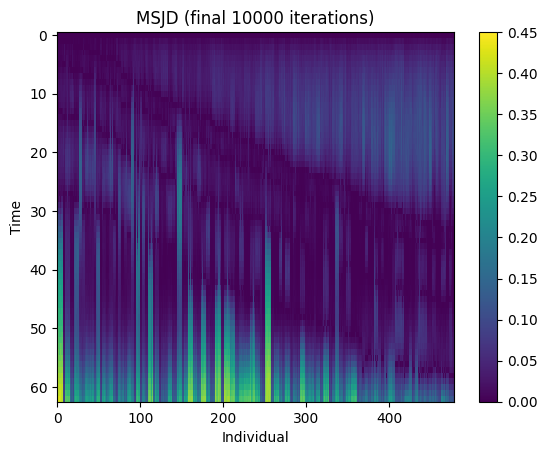

In [49]:
# plotting the MSJD
plt.imshow(MSJD,interpolation="nearest",aspect="auto",vmin=0,vmax=0.45)
plt.title(r'MSJD (final 10000 iterations)')
plt.colorbar()
plt.ylabel("Time")
plt.xlabel("Individual")
plt.show()

## conditional distribution values

In [46]:
# loading in functions for true values
%run '../../function_scripts/rippler/log_dis_theta.py'
%run '../../function_scripts/rippler/log_dis_U.py'

<Figure size 640x480 with 0 Axes>

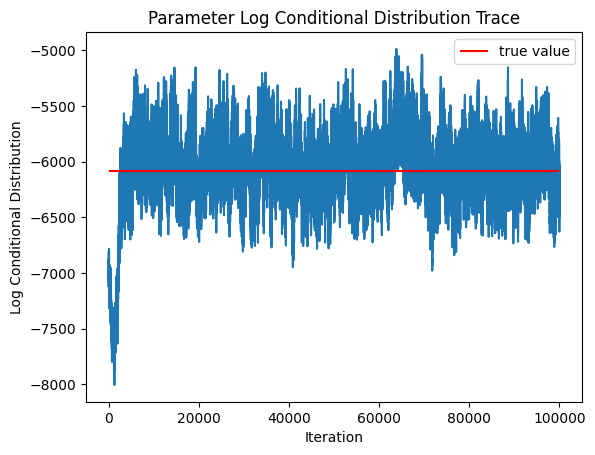

In [47]:
# importing the saved run of the log likelihood
MCMC_noncentred_like_theta = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/like_theta.zarr', mode='r')

# trace plots of the log likelihood
plt.plot(MCMC_noncentred_like_theta[:])
plt.hlines(log_dis_theta_jit(UC_results['X'],seasonal_matrix_G,seasonal_matrix_H,age,sex,theta,T,N,h,mu),0,K,colors="red",label="true value")
plt.legend()
plt.title(r'Parameter Log Conditional Distribution Trace')
plt.xlabel("Iteration")
plt.ylabel("Log Conditional Distribution")
plt.show()

# removing the traces of the log likelihood from memory
del(MCMC_noncentred_like_theta)

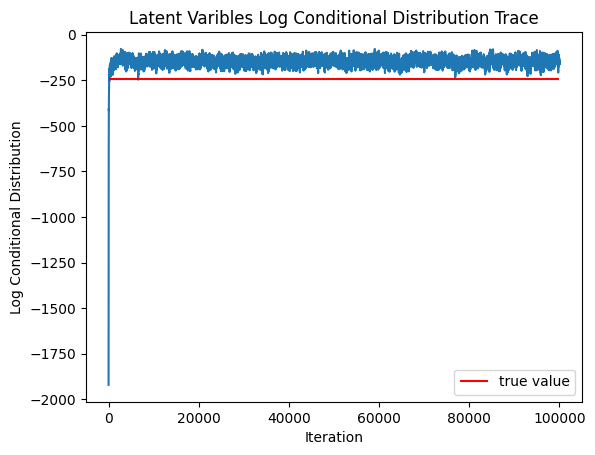

In [48]:
# importing the saved run of the log likelihood
MCMC_noncentred_like_U = zarr.open('../../../../luna/MCMC_noncentred_c25_v2/like_latent.zarr', mode='r')

# trace plots of the log likelihood
plt.plot(MCMC_noncentred_like_U[:])
plt.hlines(log_dis_U_jit(UC_results['X'],test_results,sens,spec),0,K,colors="red",label="true value")
plt.legend()
plt.title("Latent Varibles Log Conditional Distribution Trace")
plt.xlabel("Iteration")
plt.ylabel("Log Conditional Distribution")
plt.show()

# removing the traces of the log likelihood from memory
del(MCMC_noncentred_like_U)

## other stuff

In [ ]:
# add section with covariance matrix? 
# add section with U matrix? 
# add initial conditions likelihood?